In [1]:
import numpy as np
import sympy as sp
from sympy.interactive import printing
printing.init_printing()
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=270, precision=8)

%load_ext ipydex.displaytools

Dieses Notebook enthält Anregungen für Übungsaufgaben, die in Anlehnung an das Notebook [demo1](demo1.ipynb) gelöst werden können.

### Aufgabe 1

Stellen Sie die Funktionen $y_1=\sin(2\pi x)$,  $y_2=\sin(2\pi x^2)$ im Intervall $x \in [-1, 2]$ grafisch dar.

Hinweise: `np.pi`, `np.sin`

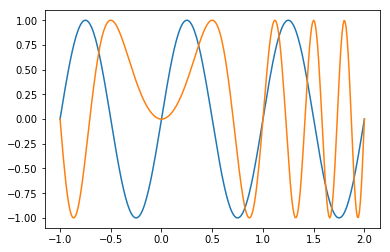

In [2]:
x = np.linspace(-1, 2, 300)
y1 = np.sin(2*np.pi*x)
y2 = np.sin(2*np.pi*x**2)

plt.plot(x, y1)
plt.plot(x, y2)

### Aufgabe 2

Reproduzieren Sie folgendens Bild

![parametrische Kurve](img/parametric_curve.png "parametrische Kurve")

Hinweis: Suchen Sie unter https://matplotlib.org/gallery/index.html nach einem passenden Beispiel (relativ weit unten)

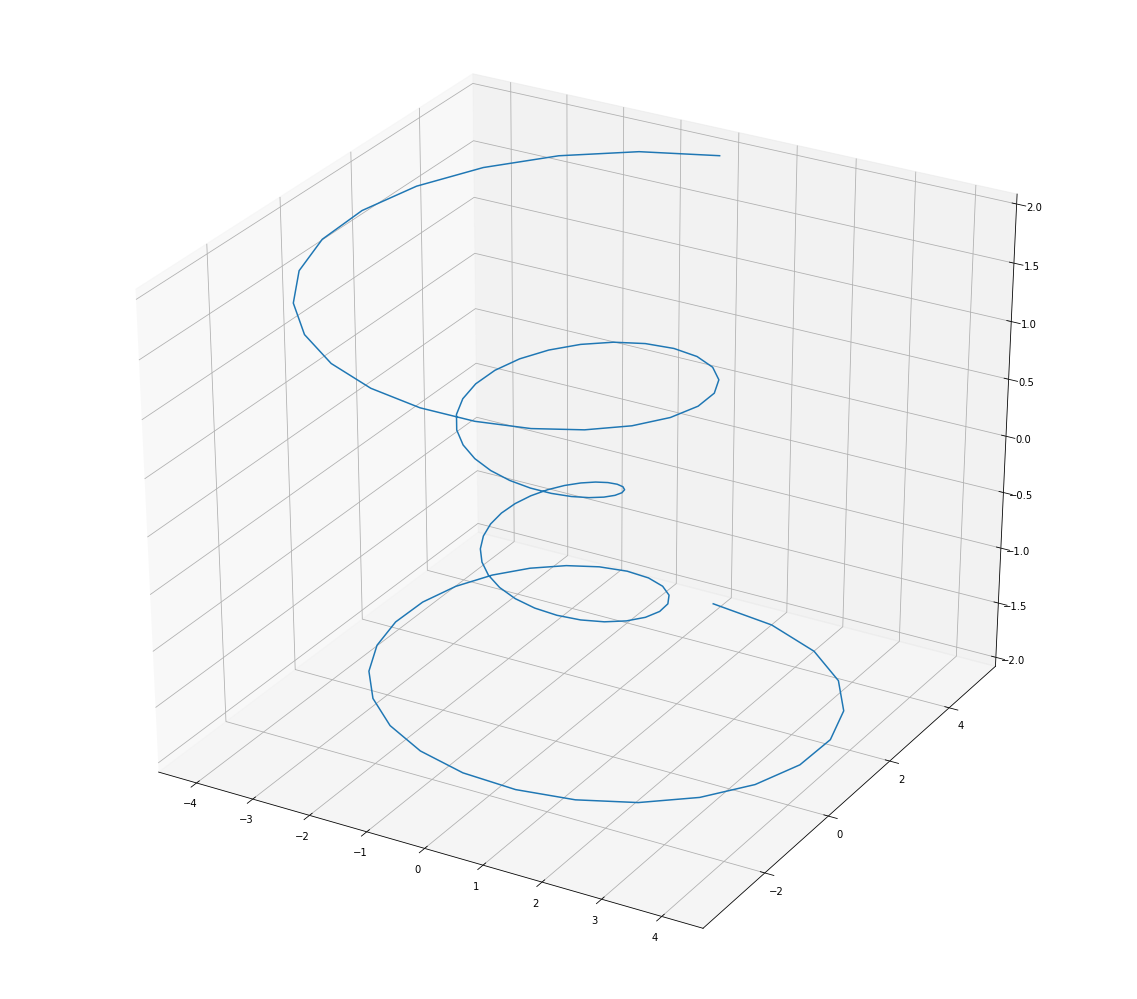

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
# %matplotlib qt für Anzeige auf dem lokalen PC

# für eingebettetes "dynamisches Bild"
# %matplotlib notebook 

# für eingebettetes statisches Bild
%matplotlib inline 

fig = plt.figure(figsize=(20, 18))
ax = plt.gca(projection='3d')

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z)

### Aufgabe 3

Lösen Sie das das folgende Gleichungssystem


$$
\underbrace{
\left(\begin{matrix}
-1 &  -1 & -1 \\
-1  & 5  & 2\\
 3 & -4  & 2 \\
\end{matrix} \right)}_{\mathbf{A}}
\cdot
\mathbf{x}
=
\underbrace{
\left(\begin{matrix}
 -16\\
 50 \\
 -14
\end{matrix} \right)}_{\mathbf{y}}
$$


und führen Sie anschließend die Probe durch:

$$
\mathbf{A}\cdot \mathbf{x}- \mathbf{y} \stackrel{!}{=} \mathbf{0}.
$$


Hinweis: `np.linalg.solve?`

In [4]:
A = np.array([[-1, -1, -1],
              [-1,  5,  2],
              [ 3, -4,  2]])

y = np.array([-16,  50, -14])

x = np.linalg.solve(A, y) ##:

A@x-y ##:

x := array([2., 8., 6.])

---


(A@x-y) := array([0., 0., 0.])

---


### Aufgabe 4

* Berechnen Sie die 1. und 2. Ableitung der Funktion $f(x) = \dfrac{\sin(x)}{x^2 + 1}$,
* bringen sie alle Ausdrücke jeweils auf einen Nenner und
* stellen Sie $f, f'$ und $f'' $ Ergebnis im Intervall $x\in [-3, 3]$ grafisch dar.


Hinweise: `sp.plot?` und  `f1.simplify()`


---


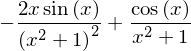

---


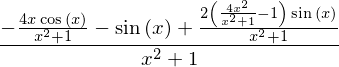

---


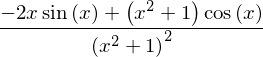

---


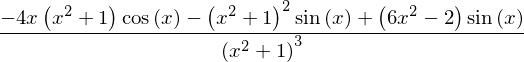

---


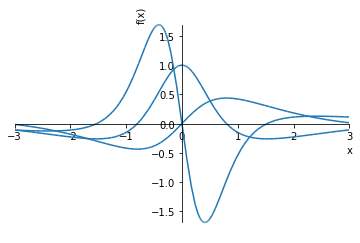

In [5]:
x = sp.symbols("x") ##:

f = sp.sin(x)/(1+ x**2)

f1 = f.diff(x) ##:

f2 = f.diff(x, 2) ##:

f1.simplify() ##:
f2.simplify() ##:


sp.plot(f, f1, f2, (x, -3, 3))

### Aufgabe 5

Gegeben ist die komplexwertige Funktion $G(j\omega) = \dfrac{1}{1 + j\omega} e^{-j\omega}$. Stellen Sie den Frequenzgang für $\omega\in (0, \inf) $ in der komplexen Ebene dar.

Hinweise: `np.logspace?` für logarithmisch skalierte Frequenz-Werte; `np.exp(...)` für Exponentialfunktion

In [6]:
omega = np.logspace(-3, 3, 1000)

jw = 1j*omega

G = 1/(1+ jw) * np.exp(-jw)

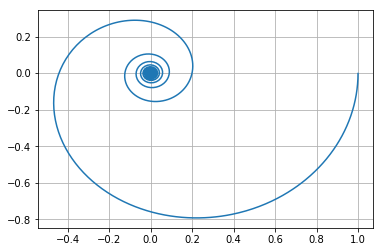

In [7]:
plt.plot(np.real(G), np.imag(G))
plt.grid()

### Aufgabe 6

Gegeben ist das lineare dynamische System 

$$
\dot {\mathbf{x}} = 
\underbrace{
\left(\begin{matrix}
-1 &  -1 & -1 \\
-1  & 5  & 2\\
 3 & -4  & 2 \\
\end{matrix} \right)}_{\mathbf{A}}
\cdot
\mathbf{x}
+ 
\underbrace{
\left(\begin{matrix}
 -16\\
 50 \\
 -14
\end{matrix} \right)}_{\mathbf{b}} u.
$$

**a)** Prüfen Sie die Stabilität des Systems.

**b)** Entwerfen Sie eine statische Zuststandsrückführung $u = - \mathbf{k}^T \mathbf{x}$, sodass das rückgeführte System die Eigenwerte $\{-1, -2, -3\}$ hat.


eigvals := array([-0.81007935+0.j        ,  3.40503967+2.63104722j,  3.40503967-2.63104722j])

---


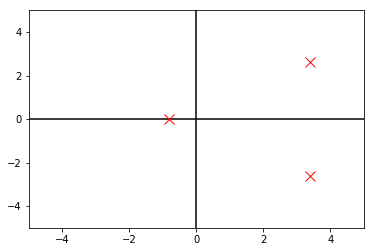

In [8]:
A = np.array([[-1, -1, -1],
              [-1,  5,  2],
              [ 3, -4,  2]])

b = np.array([-16,  50, -14])


# a)

eigvals = np.linalg.eigvals(A) ##:

plt.plot(np.real(eigvals), np.imag(eigvals), "rx", ms=10)
plt.hlines([0], -10, 10)
plt.vlines([0], -10, 10)
plt.axis([-5, 5, -5, 5])
plt.show()


→ Zwei Eigenwerte in der rechten Halbebene ⇒ instabil

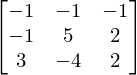

---


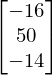

---


---


In [9]:
# b)


As = sp.Matrix(A) ##:
bs = sp.Matrix(b) ##:

kk = sp.Matrix(sp.symbols("k1, k2, k3")) ##:T


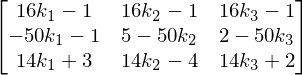

---


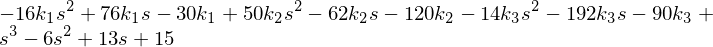

---


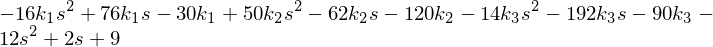

---


In [10]:
# Matrix des Rückgeführten Systems:

As_fb = As-bs*kk.T ##:

s = sp.Symbol("s")

# Chararakteristisches Polynom
cp = (s*sp.eye(3) - As_fb).det().expand() ##:

# Chararakteristisches Polynom (Vorgabe)
cp_des = (s+1)*(s+2)*(s+3)


cp_delta = cp-cp_des.expand() ##:


---


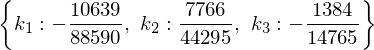

---


In [11]:
# Koeeffizientenvergleich

d0 = cp_delta.subs(s, 0)
d1 = cp_delta.diff(s).subs(s, 0)
d2 = cp_delta.diff(s, 2).subs(s, 0)

# zu lösendes Gleichungssystem ():
eqns = [d0, d1, d2] ##:

sol = sp.solve(eqns, kk) ##:

In [12]:
# Probe: Eigenwerte mit sympy berechnen

As_fb.subs(sol).eigenvals()

# Resultat ist dict mit Wert-Vielfachheit-Zuordnung